# Maria Yasin 

## 18716929

## ML with Python Assignment 1
## Encoding Category Features

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, GaussianNB, BernoulliNB, MultinomialNB
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset
cancer = pd.read_csv('breast-cancer.csv')
cancer.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [3]:
# Variable types
cancer.dtypes

Class          object
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object

## Task 1 

### Ordinal Encoder

In [4]:
y = cancer.pop('irradiat').values # Set this as the y (target) 
print(cancer.columns)
print(y)
ord_encoder = OrdinalEncoder()
cancerOE = ord_encoder.fit_transform(cancer)
cancerOE

Index(['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad'],
      dtype='object')
['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'yes' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'yes' 'yes' 'yes'
 'no' 'no' 'no' 'no' 'yes' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no' 'no'
 'yes' 'no' 'yes' 'no' 'no' 'no' 'no' 'yes' 'no' 'yes' 'yes' 'yes' '

array([[0., 1., 2., ..., 2., 0., 2.],
       [0., 2., 2., ..., 1., 1., 5.],
       [0., 2., 2., ..., 1., 0., 2.],
       ...,
       [1., 4., 0., ..., 0., 1., 3.],
       [1., 2., 0., ..., 2., 0., 2.],
       [1., 3., 0., ..., 2., 0., 2.]])

In [5]:
# Creating a new dataframe to look at our variables after applying the orinal encoder
df = pd.DataFrame(cancerOE, columns = cancer.columns)
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad
0,0.0,1.0,2.0,5.0,0.0,1.0,2.0,0.0,2.0
1,0.0,2.0,2.0,3.0,0.0,1.0,1.0,1.0,5.0
2,0.0,2.0,2.0,3.0,0.0,1.0,1.0,0.0,2.0
3,0.0,4.0,0.0,2.0,0.0,1.0,1.0,1.0,3.0
4,0.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,4.0


In [6]:
df.dtypes

Class          float64
age            float64
menopause      float64
tumor-size     float64
inv-nodes      float64
node-caps      float64
deg-malig      float64
breast         float64
breast-quad    float64
dtype: object

We can see in the above df, all our categorical variables have been changed into numerical variables.

In [7]:
#Categorical Naive Bayes
catNB = CategoricalNB(fit_prior=True,alpha = 0.0001)
cancer_catNB = catNB.fit(cancerOE,y)
y_dash = cancer_catNB.predict(cancerOE) # y_dash is the prediction
confusion = confusion_matrix(y, y_dash)
print("Confusion matrix:\n{}".format(confusion)) 

Confusion matrix:
[[190  28]
 [ 33  35]]


The above code implements the Categorical Naive Bayes algorithm on our array 'cancerOE'. The code trains the classifier using the fit method, makes predictions on the data using the predict method, it computes the confusion matrix to evaluate the performance of the classifier. Finally, we get the confusion matrix as seen above. 

The confusion matrix above has 190 true negatives (TN), 33 false negatives (FN), 28 false positives (FP), and 35 true positives (TP).

In [8]:
#accuracy
from sklearn.metrics import accuracy_score
OEaccuracy_beforesplit = accuracy_score(y,y_dash)
# Print the accuracy
print(f"Accuracy: {OEaccuracy_beforesplit}")

Accuracy: 0.7867132867132867


The classifier correctly classified 225 samples (190 TNs and 35 TPs) out of a total of 286 samples, i.e., it has an accuracy of approximately 78.7%.

### OneHot Encoder

In [9]:
#Load the dataset again
cancer = pd.read_csv('breast-cancer.csv')
cancer
## OneHot Encoder
y = cancer.pop('irradiat').values # Set this as the y (target)
onehot_encoder = OneHotEncoder(sparse=False)
cancerOH = onehot_encoder.fit_transform(cancer)
cancerOH

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [10]:
#Features 
onehot_encoder.get_feature_names_out(cancer.columns)

array(['Class_no-recurrence-events', 'Class_recurrence-events',
       'age_20-29', 'age_30-39', 'age_40-49', 'age_50-59', 'age_60-69',
       'age_70-79', 'menopause_ge40', 'menopause_lt40',
       'menopause_premeno', 'tumor-size_0-4', 'tumor-size_10-14',
       'tumor-size_15-19', 'tumor-size_20-24', 'tumor-size_25-29',
       'tumor-size_30-34', 'tumor-size_35-39', 'tumor-size_40-44',
       'tumor-size_45-49', 'tumor-size_5-9', 'tumor-size_50-54',
       'inv-nodes_0-2', 'inv-nodes_12-14', 'inv-nodes_15-17',
       'inv-nodes_24-26', 'inv-nodes_3-5', 'inv-nodes_6-8',
       'inv-nodes_9-11', 'node-caps_?', 'node-caps_no', 'node-caps_yes',
       'deg-malig_1', 'deg-malig_2', 'deg-malig_3', 'breast_left',
       'breast_right', 'breast-quad_?', 'breast-quad_central',
       'breast-quad_left_low', 'breast-quad_left_up',
       'breast-quad_right_low', 'breast-quad_right_up'], dtype=object)

In [11]:
bnb = BernoulliNB()
cancer_numNB = bnb.fit(cancerOH,y)
y_dash = cancer_numNB.predict(cancerOH) # y_dash is the prediction

Here we are performing classification on the cancerOH array using the Bernoulli Naive Bayes algorithm. The fit method is used to train the classifier on the data, and the predict method is used to generate predictions based on the trained classifier.

In [12]:
#Confusion matrix
confusion = confusion_matrix(y, y_dash)
print("Confusion matrix:\n{}".format(confusion)) 

Confusion matrix:
[[187  31]
 [ 29  39]]


The confusion matrix in the code has 187 true negatives (TN), 39 true positives (TP), 31 false positives (FP), and 29 false negatives (FN). 

In [13]:
#accuracy
OHEaccuracy_beforesplit = accuracy_score(y,y_dash)
# Print the accuracy
print(f"Accuracy: {OHEaccuracy_beforesplit}")

Accuracy: 0.7902097902097902


The classifier correctly classified 226 samples out of a total of 286 samples, resulting in an accuracy of approximately 79%.

## Task 2

### CatBoost Encoder

In [14]:
import category_encoders as ce

In [15]:
#Load the dataset again
cancer = pd.read_csv('breast-cancer.csv')
cancer
# Define train and target
y = cancer['irradiat'] #target
x = cancer.drop('irradiat', axis = 1) #train

y = LabelEncoder().fit_transform(y) # convert y to numeric
# Define catboost encoder
cbe_encoder = ce.cat_boost.CatBoostEncoder()

Here we are setting the target variable y as the 'irradiat' column of the cancer dataframe, while the input features x are defined as all other columns except the 'irradiat' column in the breast cancer dataset.

We than apply the LabelEncoder() from the sklearn library to encode the target variable y as numeric values.

Finally, we define the CatBoostEncoder() encoder from the category_encoders library, which can be used later to encode categorical variables.

In [16]:
# Fit encoder and transform the features
cbe_encoder.fit(x,y)
train_cbe = cbe_encoder.transform(x)

This code fits the CatBoostEncoder() encoder to the input features x and target variable y using the fit() function.

Then, it uses the learned encoding mappings to transform the categorical variables in x using the target variable y. The encoded dataset is stored in a variable called train_cbe.

In [17]:
#Confusion Matrix
cancer_numGNB = GaussianNB().fit(train_cbe,y)
y_dash = cancer_numGNB.predict(train_cbe) # y_dash is the prediction
confusion = confusion_matrix(y, y_dash)
print("Confusion matrix:\n{}".format(confusion)) 

Confusion matrix:
[[181  37]
 [ 26  42]]


Here we are using the GaussianNB() function from sklearn library to train a Naive Bayes model on the encoded dataset train_cbe and the target variable y.

We then make predictions on the same dataset using the predict() function and stores the results in a variable y_dash.

Finally, we compute the confusion matrix using the confusion_matrix() function from sklearn.metrics library, comparing the true target variable y with the predicted values y_dash. 


The model correctly predicted 223 samples (181 TN and 42 TP) out of 286, and misclassified 63 samples (37 FP and 26 FN).

In [18]:
#accuracy
CBEaccuracy_beforesplit = accuracy_score(y,y_dash)
# Print the accuracy
print(f"Accuracy: {CBEaccuracy_beforesplit}")

Accuracy: 0.7797202797202797


the accuracy of the model is 77.97%.

## Task 3

### Train-Test Split

In [19]:
#Splitting the data as 50:50 (i.e. use 50% of the data for testing)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

X_train.shape
X_test.shape  

(143, 9)

In [20]:
#Ordinal encoder after the train-test split
ord_encoder = OrdinalEncoder()
cancerOE2 = ord_encoder.fit_transform(X_train)
cancerOE2

array([[1., 0., 2., ..., 2., 0., 2.],
       [1., 1., 2., ..., 1., 0., 3.],
       [1., 1., 2., ..., 2., 1., 5.],
       ...,
       [0., 1., 0., ..., 2., 0., 3.],
       [0., 2., 2., ..., 0., 1., 3.],
       [0., 3., 0., ..., 1., 1., 5.]])

In [21]:
#Categorical Naive Bayes
catNB = CategoricalNB(fit_prior=True,alpha = 0.0001)
cancer_catNB = catNB.fit(cancerOE2,y_train)
y_dash2 = cancer_catNB.predict(cancerOE2) #prediction after the train-test split
confusion = confusion_matrix(y_train, y_dash2)
print("Confusion matrix:\n{}".format(confusion)) 

Confusion matrix:
[[98 11]
 [16 18]]


We repeat the same steps from the previous tasks, fit and transform the data after train-test split. We train the classifier using the fit method, make predictions on the data using the predict method and generate a confusion matrix.

In [22]:
#accuracy
OEaccuracy_aftersplit = accuracy_score(y_train,y_dash2)
# Print the accuracy
print(f"Accuracy: {OEaccuracy_aftersplit}")

Accuracy: 0.8111888111888111


Our Ordinal encoder classifier has an accuracy of 81.1% after the train-test split. This means that our classifierl has improved after the split.

In [23]:
#### OneHot after train-test split
onehot_encoder = OneHotEncoder(sparse=False)
cancerOH2 = onehot_encoder.fit_transform(X_train)
cancerOH2

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [24]:
bnb = BernoulliNB()
cancer_numNB = bnb.fit(cancerOH2,y_train)
y_dash3 = cancer_numNB.predict(cancerOH2)  #prediction after the train-test split

In [25]:
confusion = confusion_matrix(y_train, y_dash3)
print("Confusion matrix:\n{}".format(confusion)) 

Confusion matrix:
[[92 17]
 [16 18]]


In [26]:
OHEaccuracy_aftersplit = accuracy_score(y_train,y_dash3)
# Print the accuracy
print(f"Accuracy: {OHEaccuracy_aftersplit}")

Accuracy: 0.7692307692307693


Once again, we repeat the same steps for OneHot Encoder after the train-test split. The new classifier has an accuracy of 76.92%. We can see that the accuracy of OneHot Encoder has slightly decreased after the train-test split.

In [27]:
###CatBoost after train-test split
# Fit encoder and transform the features
cbe_encoder.fit(x,y)
train_cbe2 = cbe_encoder.transform(X_train)

In [28]:
cancer_numGNB = GaussianNB().fit(train_cbe2,y_train)
y_dash4 = cancer_numGNB.predict(train_cbe2)  #prediction after the train-test split
confusion = confusion_matrix(y_train, y_dash4)
print("Confusion matrix:\n{}".format(confusion)) 

Confusion matrix:
[[89 20]
 [10 24]]


In [29]:
#accuracy
CBEaccuracy_aftersplit = accuracy_score(y_train,y_dash4)
# Print the accuracy
print(f"Accuracy: {CBEaccuracy_aftersplit}")

Accuracy: 0.7902097902097902


Lastly, we fit and tranform the data using CatBoost Encoder after the train-test split and calculate the accuracy of our predictions after the split using the confusion matrix. We get an accuracy of 79.02%. Our accuracy for the CatBoost encoder classifier has increased slightly after the train-test split.

## Task 4

## Plot

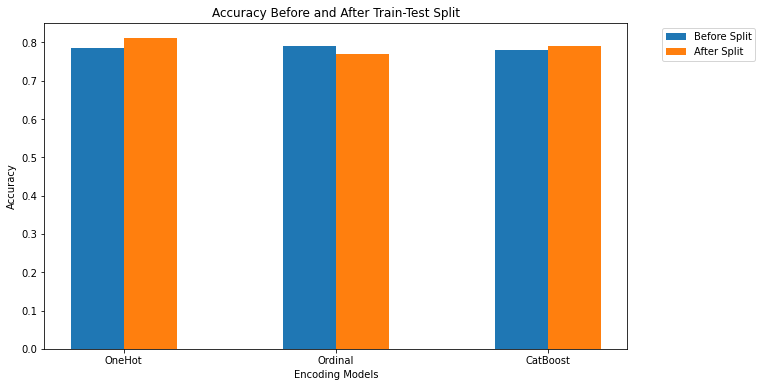

In [30]:
# data
before_split = [OEaccuracy_beforesplit, OHEaccuracy_beforesplit, CBEaccuracy_beforesplit]
after_split = [OEaccuracy_aftersplit, OHEaccuracy_aftersplit, CBEaccuracy_aftersplit]

# set the width of the bars
bar_width = 0.25

# create an array of indices for the bars
indices = np.arange(len(before_split))

# create a new figure object with a larger size
fig, ax = plt.subplots(figsize=(12, 6))

# plot the bar chart
ax.bar(indices, before_split, width=bar_width, label='Before Split')
ax.bar(indices + bar_width, after_split, width=bar_width, label='After Split')

# label the x-axis
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(['OneHot','Ordinal','CatBoost'])

# add labels and title
ax.set_xlabel('Encoding Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Before and After Train-Test Split')

# adjust the position and size of the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# adjust the plot layout to accommodate the legend
plt.subplots_adjust(right=0.8)

# show the plot
plt.show()

The above plot clearly shows us the accuracy of our 3 classifiers before and after the Train-Test Split. We can conclude that the accuracy for our OneHot encoder classifier and CatBoost encoder classifier has increased after the train-test split, whereas, the accuracy of our Ordinal encoder classifier has decreased after the split.